# Questions

learnopencv
pyimagesearch

https://github.com/ultralytics/yolov5/issues/36
mAP 
https://towardsdatascience.com/map-mean-average-precision-might-confuse-you-5956f1bfa9e2
https://blog.paperspace.com/mean-average-precision/

# P7 Object Detection with YOLO

# Setup

In [1]:
import torch
import os
import shutil
from sys import platform
import sys, subprocess
import yaml
import random
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

## Load and test the model with eval file
os.system('git clone https://github.com/ultralytics/yolov5')  # clone repo

os.chdir("yolov5")
os.system('pip install -qr requirements.txt')
# test on sample
os.system('python yolov5/detect.py --weights yolov5/yolov5s.pt --img 640 --conf 0.25 --source yolov5/data/images/')
os.chdir('..')

Setup complete. Using torch 1.9.1+cpu (CPU)


In [3]:
os.system('git clone https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format.git')
os.system('pip install -r OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/requirements.txt')

# Creating folders for the dataset
os.chdir("OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/OID") 
os.mkdir('open_img')
os.chdir("../..") 

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: 'open_img'

# Dataset

In [16]:
########################################################
#
#  Download dataset
# /!\ Must be runned in cmd prompt if the OS is windows
#
########################################################
os.chdir("OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format") 

## Theses ones doesn't work
# subprocess.call(['python', 'main.py', 'downloader', '--Dataset', 'open_img', '--classes', 'Bicycle', '--type_csv', 'train', '--yoloLabelStyle', '--limit', '1000', '-y'])
# subprocess.run(['python', 'main.py', 'downloader', '--Dataset', 'open_img', '--classes', 'Bicycle', '--type_csv', 'validation', '--yoloLabelStyle'])
# os.system('python main.py downloader --Dataset open_img --classes Bicycle --type_csv train --yoloLabelStyle --limit 1000 -y')
# os.system('python main.py downloader --Dataset open_img --classes Bicycle --type_csv validation --yoloLabelStyle -y')

!python main.py downloader --Dataset open_img --classes Bicycle --type_csv validation --yoloLabelStyle -y
!python main.py downloader --Dataset open_img --classes Bicycle --type_csv train --limit 1000 --yoloLabelStyle -y

os.chdir("..") 

    [INFO] |  saving dataset configurations at ./OID\open_img\config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Bicycle.


Traceback (most recent call last):
  File "c:\Users\Admin\Documents\Formation_ML\7_preuve_de_concept\OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format\modules\downloader.py", line 26, in download
    columns, rows = os.get_terminal_size(0)
OSError: [WinError 6] Descripteur non valide

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Admin\Documents\Formation_ML\7_preuve_de_concept\OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format\main.py", line 37, in <module>
    bounding_boxes_images(args, DEFAULT_OID_DIR)
  File "c:\Users\Admin\Documents\Formation_ML\7_preuve_de_concept\OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format\modules\bounding_boxes.py", line 92, in bounding_boxes_images
    download(args, df_val, folder[1], dataset_dir, class_name, class_code,class_list_for_yolo=args.classes)
  File "c:\Users\Admin\Documents\Formation_ML\7_preuve_de_concept\OIDv6_ToolKit_Download_Open_Images_Support_Yolo

In [18]:
# Moving the ds to the right place
shutil.move("OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/OID/open_img", "datasets/")

# Create the YAML file for the dataset
data = dict(train='../datasets/open_img/train/Bicycle/images/',
               val='../datasets/open_img/validation/Bicycle/images/',
               nc=1,
               names=['bicycle'])

with open('yolov5/data/bicycle.yaml', 'w') as file:
    yaml.dump(data, file)
print(open('yolov5/data/bicycle.yaml').read())

names:
- bicycle
nc: 1
train: ../datasets/open_img/train/Bicycle/images/
val: ../datasets/open_img/validation/Bicycle/images/



# Train

In [1]:
########################################################
#
#  train the new weights
# /!\ Must be runned in cmd prompt if the OS is windows
#
########################################################
os.chdir("yolov5")
print("-"*60)
print('Training YOLOv5s on Open images - Bicycles training set')
print("-"*60)
# subprocess.run(['python', 'train.py', '--img', '640', '--batch', '16 ', '--epochs', '10', '--data', 'data/bicycle.yaml', '--weights', 'yolov5s.pt'])
!python train.py --img 640 --batch 16 --epochs 3 --data data/bicycle.yaml --weights yolov5s.pt
os.chdir("..")

------------------------------------------------------------
Training YOLOv5s on Open images - Bicycles training set
------------------------------------------------------------
^C


# Eval

In [ ]:
# Evaluate validation set
os.chdir("yolov5")
print("-"*60)
if torch.cuda.is_available():
    print('Evaluation of YOLOv5 custom on Open images - Bicycles validation set with gpu')
    print("-"*60)
    subprocess.run(['python', 'val.py', '--weights', 'runs/train/exp/weights/best.pt', '--data', 'data/bicycle.yaml', '--img', '640', '--iou', '0.65', '--half'])
else:
    print('Evaluation of YOLOv5 custom on Open images - Bicycles validation set with cpu')
    print("-"*60)
    subprocess.run(['python', 'val.py', '--weights', 'runs/train/exp/weights/best.pt', '--data', 'data/bicycle.yaml', '--img', '640', '--iou', '0.65'])
os.chdir('..')

# Inference with sample

In [ ]:

os.chdir("yolov5")
print("-"*60)
print('Inference on th Bicycles validation set')
print("-"*60)
subprocess.run(['python', 'detect.py', '--source', '../datasets/open_img/validation/Bicycle/images', '--weights', 'runs/train/exp/weights/best.pt', '--conf', '0.25', '--name', 'yolo_bicycles'])
os.chdir('..')

In [13]:
annot_path = 'datasets/open_img/validation/Bicycle/labels/'
annotations = [os.path.join(annot_path, x) for x in os.listdir(annot_path)]

# class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))
class_id_to_name_mapping = {0 : 'bicycle'}

def plot_bounding_box(image_path, annotation_list, img_detect_path=None):

   
    #Load the image
    image = Image.open(image_path)

    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)), width=5, outline ='red')
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])

    if not(img_detect_path==None):
        image_name = os.path.basename(image_path)
        image_detect = Image.open(img_detect_path + image_name)

        plt.figure(figsize=(20, 10))
        plt.subplot(121)
        plt.imshow(np.array(image))
        plt.title('Image with annotations')
        plt.subplot(122)
        plt.title('Inference from trained YOLOv5')
        plt.imshow(np.array(image_detect))

    else:
        plt.figure(figsize=(10, 10))
        plt.imshow(np.array(image))
    plt.show()

# Get any random image with annotation file from annotations
def get_random_img_annot(annotations):
    annotation_file = random.choice(annotations)
    with open(annotation_file, "r") as file:
        annotation_list = file.read().split("\n")[:-1]
        annotation_list = [x.split(" ") for x in annotation_list]
        annotation_list = [[float(y) for y in x ] for x in annotation_list]
    
    #Get the corresponding image file
    image_path = annotation_file.replace("labels", "images").replace("txt", "jpg")
    assert os.path.exists(image_path)

    return annotation_list, image_path

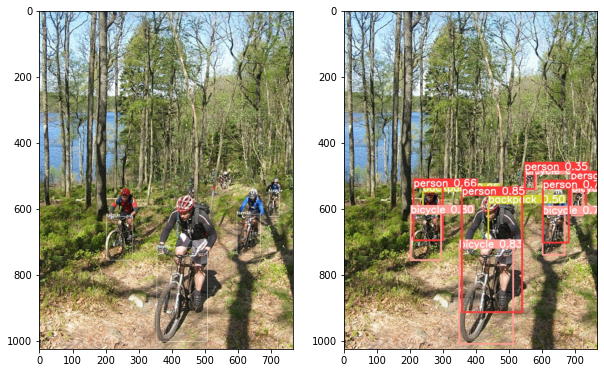

In [14]:
annotation_list, image_path = get_random_img_annot(annotations)

#Plot the Bounding Box
plot_bounding_box(image_path, annotation_list, "yolov5/runs/detect/yolo_bicycles/")